In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import shap



df=pd.read_csv("Dataset\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

<>:11: SyntaxWarning: invalid escape sequence '\O'
<>:11: SyntaxWarning: invalid escape sequence '\O'
C:\Users\E N V Y\AppData\Local\Temp\ipykernel_2852\222153463.py:11: SyntaxWarning: invalid escape sequence '\O'
  df=pd.read_csv("Dataset\ObesityDataSet_raw_and_data_sinthetic.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset\\ObesityDataSet_raw_and_data_sinthetic.csv'

In [ ]:
print(df.head())

NameError: name 'df' is not defined

In [ ]:
print(df.info())

NameError: name 'df' is not defined

In [ ]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [ ]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
print(df.duplicated().sum())

24


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


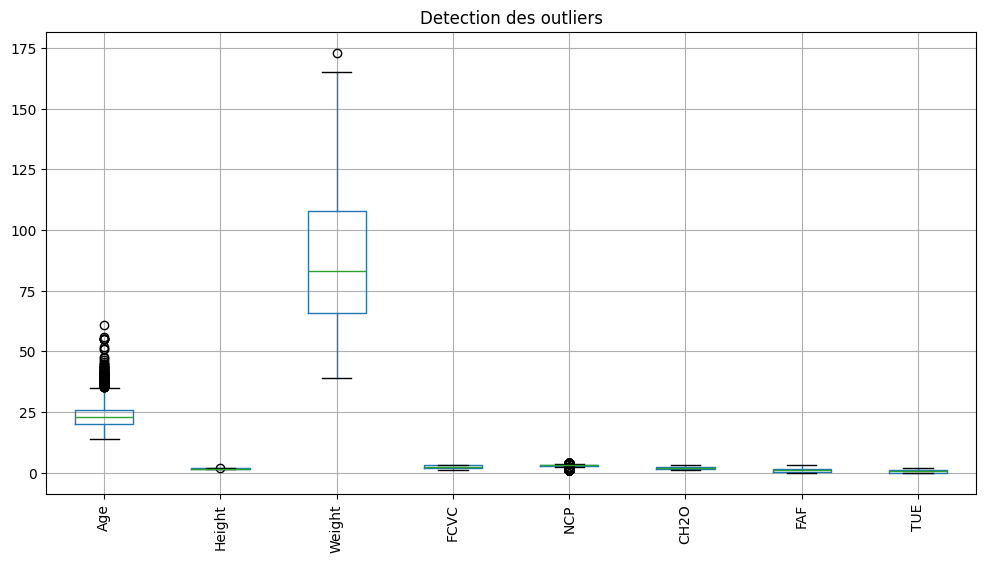

In [ ]:
import matplotlib.pyplot as plt
df.head()
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Detection des outliers")
plt.show()

In [ ]:
from scipy.stats import zscore 
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Nombre d'outliers detectes par case :")
print(outliers)

Nombre d'outliers detectes par case :
[23  0  1  0  0  0  0  0]


In [ ]:
duplicates = df[df.duplicated(keep=False)]

In [ ]:
print(df.duplicated().sum()) 

0


In [ ]:
duplicates = df[df.duplicated(keep=False)]

print("Lignes dupliquées :")
print(duplicates)

Lignes dupliquées :
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


In [ ]:
for col in df.columns:
    duplicate_col = df.duplicated(subset=[col], keep=False)
    if duplicate_col.any():
        print(f"Doublons détectés dans la colonne: {col}")
        print(df.loc[duplicate_col, [col]])


Doublons détectés dans la colonne: Gender
      Gender
0     Female
1     Female
2       Male
3       Male
4       Male
...      ...
2106  Female
2107  Female
2108  Female
2109  Female
2110  Female

[2087 rows x 1 columns]
Doublons détectés dans la colonne: Age
       Age
0     21.0
1     21.0
2     23.0
3     27.0
4     22.0
...    ...
2090  26.0
2091  26.0
2092  26.0
2093  26.0
2094  26.0

[720 rows x 1 columns]
Doublons détectés dans la colonne: Height
        Height
0     1.620000
1     1.520000
2     1.800000
3     1.800000
4     1.780000
...        ...
1629  1.697421
1637  1.750150
1683  1.755938
1779  1.603501
2068  1.697421

[564 rows x 1 columns]
Doublons détectés dans la colonne: Weight
          Weight
0      64.000000
1      56.000000
2      77.000000
3      87.000000
5      53.000000
...          ...
1523  120.860386
1525  120.000000
1543  116.160329
1545  120.860386
1613  120.000000

[620 rows x 1 columns]
Doublons détectés dans la colonne: family_history_with_overweight


In [ ]:

df_numeric = df.select_dtypes(include=['number'])


Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1


outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

print("Outliers détectés par la méthode IQR :")
print(outliers_iqr)


Outliers détectés par la méthode IQR :
Age       167
Height      1
Weight      1
FCVC        0
NCP       577
CH2O        0
FAF         0
TUE         0
dtype: int64


In [ ]:
df = df.drop_duplicates()
print(df.shape)  

(2087, 17)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


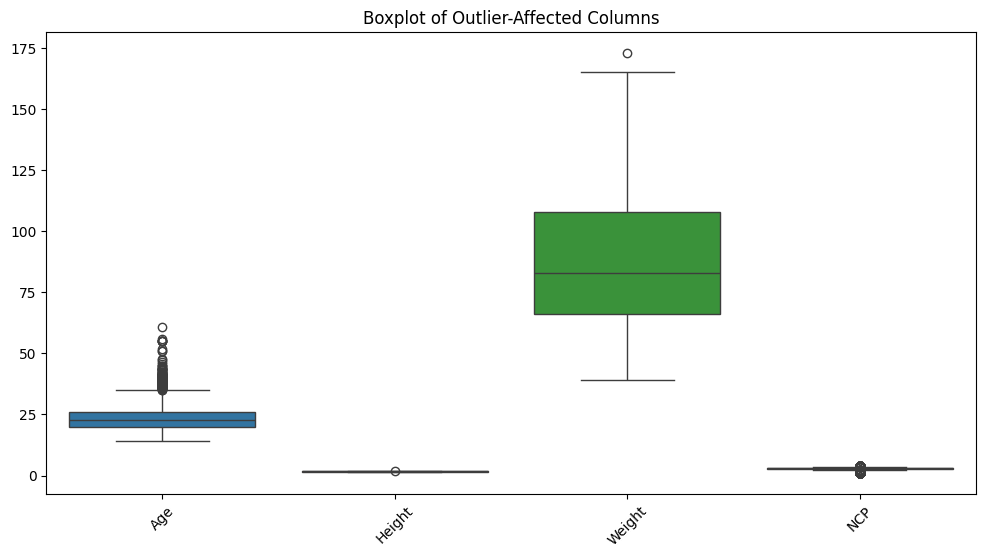

In [ ]:

df_numeric = df.select_dtypes(include=['number'])

print(df_numeric.columns)


plt.figure(figsize=(12, 6))


sns.boxplot(data=df_numeric[['Age', 'Height', 'Weight', 'NCP']])

plt.xticks(rotation=45)
plt.title("Boxplot of Outlier-Affected Columns")
plt.show()


In [ ]:
Q1_NCP = df['NCP'].quantile(0.25)
Q3_NCP = df['NCP'].quantile(0.75)
IQR_NCP = Q3_NCP - Q1_NCP


lower_bound = max(Q1_NCP - 1.5 * IQR_NCP, 1) 
upper_bound = min(Q3_NCP + 1.5 * IQR_NCP, 5) 


df_capped = df.copy()
df_capped['NCP'] = df['NCP'].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
df_filtered = df[(df['NCP'] >= 1) & (df['NCP'] <= 5)]


C:\Users\louki\AppData\Local\Temp\ipykernel_7608\3034781508.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


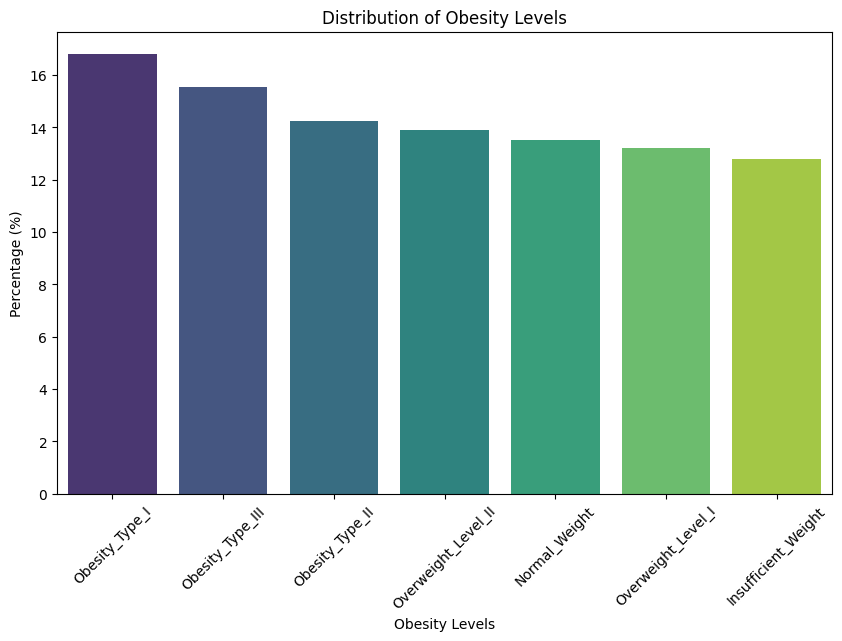

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


class_distribution = df['NObeyesdad'].value_counts(normalize=True) * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


plt.xlabel("Obesity Levels")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=45) 

plt.show()



In [ ]:
target_col = 'NObeyesdad'  

class_distribution = df[target_col].value_counts()

print("Class Distribution:\n", class_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.xlabel("Obesity Level Classes")
plt.ylabel("Count")
plt.title("Distribution of Obesity Classes")
plt.xticks(rotation=45)  
plt.show()

In [ ]:

class_distribution = df['NObeyesdad'].value_counts(normalize=True) * 100
print(class_distribution)


In [ ]:
from imblearn.over_sampling import SMOTE
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad') 

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

target_col = "NObeyesdad"
X = df.drop(columns=[target_col])
y = df[target_col]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

from collections import Counter
print("New class distribution:", Counter(y_resampled))

plt.figure(figsize=(10, 6))
sns.barplot(x=pd.Series(y_resampled).value_counts().index,
            y=pd.Series(y_resampled).value_counts().values,
            palette="viridis")
plt.xlabel("Obesity Level Classes")
plt.ylabel("Count")
plt.title("Balanced Distribution of Obesity Classes After SMOTE")
plt.xticks(rotation=45)
plt.show()

In [ ]:

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
correlation_threshold = 0.8
strong_correlations = {}
for col in correlation_matrix.columns:
    strong_corrs = correlation_matrix[col][(correlation_matrix[col] > correlation_threshold) & (correlation_matrix[col] < 1)].index.tolist()
    if strong_corrs:
        strong_correlations[col] = strong_corrs
strong_correlations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd

df=pd.read_csv(r"C:\Users\kh\Downloads\obesity.csv")
df.head()

X = df.drop(columns=['NObeyesdad']).copy()  
y = df['NObeyesdad']
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col]) 
    label_encoders[col] = le  
scaler = StandardScaler()
X.loc[:, X.select_dtypes(include=['number']).columns] = scaler.fit_transform(X.select_dtypes(include=['number']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train.shape, X_test.shape, y_train.shape, y_test.shape